In [3]:
#import dependencies
import pandas as pd
import seaborn as sns

In [4]:
#import the file from github to a dataframe
url = 'https://github.com/Bropell/Asthma_Analysis_in_California_Counties/raw/main/Resources/Raw_Data/asthma-prevalence-3.xlsx'
asthma_df = pd.read_excel(url)
asthma_df

,COUNTY,YEARS,STRATA,AGE GROUP,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL,COUNTIES GROUPED,COMMENT
0,California,2015–2016,Total population,All ages,0.086958,(8.1–9.3),NaN,NaN
1,Alameda,2015–2016,Total population,All ages,0.090542,(5.9–12.2),NaN,NaN
2,Alpine,2015–2016,Total population,All ages,0.093000,(4.1–14.6),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
3,Amador,2015–2016,Total population,All ages,0.093000,(4.1–14.6),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
4,Butte,2015–2016,Total population,All ages,0.094291,(3.8–15.1),NaN,Estimate is statistically unstable. Caution is...
...,...,...,...,...,...,...,...,...
821,Tulare,2017–2018,Age groups,65+ years,NaN,NaN,NaN,Prevalence not available due to unreliable est...
822,Tuolumne,2017–2018,Age groups,65+ years,0.140353,(5.9–22.2),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
823,Ventura,2017–2018,Age groups,65+ years,0.119366,(3.3–20.5),NaN,Estimate is statistically unstable. Caution is...
824,Yolo,2017–2018,Age groups,65+ years,NaN,NaN,NaN,Prevalence not available due to unreliable est...


In [5]:
#reduce columns to 'COUNTY', 'YEARS', 'STRATA', 'AGE GROUP', 'CURRENT PREVALENCE'
asthma_df2 = asthma_df[['COUNTY', 'YEARS', 'STRATA', 'AGE GROUP', 'CURRENT PREVALENCE']]
#asthma_df2 = asthma_df2.set_index("COUNTY")

In [6]:
# Remove unneeded values from DF
asthma_df3 = asthma_df2.loc[asthma_df2['AGE GROUP'] == 'All ages']
asthma_df3 = asthma_df3.loc[asthma_df3['YEARS'] == '2015–2016']
asthma_df3 = asthma_df3[['COUNTY','CURRENT PREVALENCE']]
asthma_df4 = asthma_df3.loc[asthma_df3['COUNTY'] != 'California']

In [7]:
# Fill in missing value with corresponding value from 2017-2018
asthma_df5 = asthma_df4.fillna(.137846)

In [8]:
# Check dtypes
asthma_df5.dtypes

COUNTY                 object
CURRENT PREVALENCE    float64
dtype: object

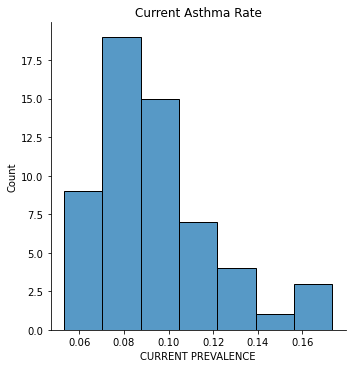

In [14]:
sns.displot(data=asthma_df5, x='CURRENT PREVALENCE').set(title='Current Asthma Rate')

In [12]:
asthma_df5.loc[asthma_df5['CURRENT PREVALENCE'] >= .14]

,COUNTY,CURRENT PREVALENCE
15,Kern,0.166745
16,Kings,0.157606
17,Lake,0.173321
58,Yuba,0.147806
